In [ ]:
# Andrianov Daniil, CMC MSU student of 501 group
# "Forestry Model" practical work
# Subject: Multi-Objective Optimization Problem-solving Techniques
# 
# Problem conditions:
# x' = f(t, x)
# f(t, x) = g(t)*f(x) - u(t) 
# g(t) = 2*t^-0.8
# f(x) = x*e^-x/10

In [ ]:
# Python libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Runge-Kutta method is not used because it takes too much time to calculate
def calc_x_runge_cutt(U, N, T, tau, massg):
    x = np.zeros(N)
    x[0] = 25.0
    1.0 / 0.0
    for i in range(1, N):
        k1 = massg[i-1] * (x[i-1] * np.exp(-0.1 * x[i-1])) - U[i-1]
        pow_g = 0.5*(massg[i-1] + massg[i])
        k2 = pow_g * ((x[i-1] + k1*(tau/2.0)) * np.exp(-0.1 * (x[i-1] + k1*tau/2.0))) - (U[i-1] + U[i])/2.0
        k3 = pow_g * ((x[i-1] + k2*(tau/2.0)) * np.exp(-0.1 * (x[i-1] + k2*tau/2.0))) - (U[i-1] + U[i])/2.0
        k4 = massg[i] * ((x[i-1] + k3*tau) * np.exp(-0.1 * (x[i-1] + k3*tau))) - U[i]
        x[i] = x[i-1] + (tau / 6.0) * (k1 + 2.0*k2 + 2.0*k3 + k4)
    return x

In [ ]:
# Euler method is easier and takes less time to calculate 
def eyler_solver(U, N, T, tau, massg):
    x = np.zeros(N)
    x[0] = 25.0
    for i in range(1, N):
        x[i] = x[i-1] + tau*(massg[i-1] * (x[i-1] * np.exp(-0.1 * x[i-1])) - U[i-1])
    return x

In [ ]:
# J functional calculation
def calc_J(U, N, T, tau, integral_1, massg):
    in_integral_3 = eyler_solver(U, N, T, tau, massg) - 20.0 * np.ones(N)
    integral_3 = np.ones(N)
    integral_3[0] = 0.5
    integral_3[-1] = 0.5
    second = np.dot(integral_3, in_integral_3 * in_integral_3) * tau
    return (np.dot(integral_1, U), second)

In [ ]:
# J functional calculation with lyambdas
def calc_J_with_l(U, N, T, tau, l1, integral_1, massg):
    first, second = calc_J(U, N, T, tau, integral_1, massg)
    return l1 * first + (1.0 - l1) * second

In [ ]:
# g(t) function
def g_in_diff_eq(t):
    return 2.0 * np.power(t + 5.0, -0.8);

In [ ]:
# Optimal J functional searching
def optimal_J(N, tau, T, l1):
    integral_1 = np.array([-1.0 * tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
    integral_1[0] *= 0.5
    integral_1[-1] *= 0.5
    mass_of_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
    U_init = 0.2 * np.ones(N)
    opt = minimize(calc_J_with_l, U_init, method='SLSQP', args=(N, T, tau, l1, integral_1, mass_of_g),
                   bounds=[(0.0, 15.0 / float(0.1 * i + 1.0)) for i in range(0, N)], options={'disp': True}) 
    return opt.x

In [ ]:
# Values setting and getting the first results
T = 35.0
tau = 0.1
N = int(T / tau)
res_1 = optimal_J(N, tau, T, 0.5)

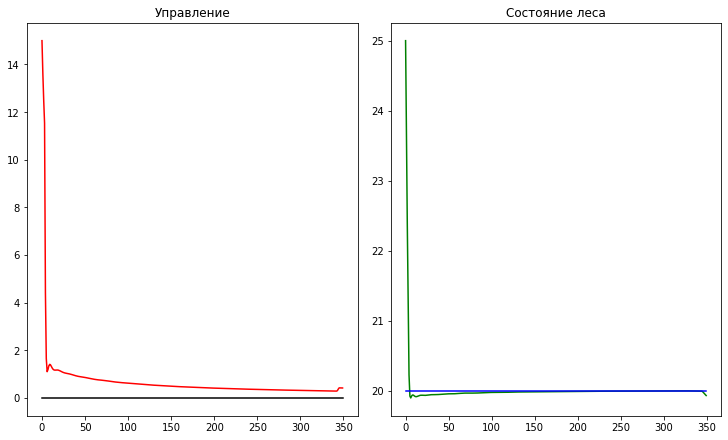

In [ ]:
# Graphs
fg = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fg.add_gridspec(1, 2)
ax_1 = fg.add_subplot(gs[0,0])
ax_1.set_title('Управление')
ax_2 = fg.add_subplot(gs[0,1])
ax_2.set_title('Состояние леса')
ax_1.plot(res_1, color='red')
ax_1.plot(np.zeros(N), color='black')
ax_2.plot(eyler_solver(res_1, N, T, tau, np.array([g_in_diff_eq(tau*i) for i in range(0, N)])), color='green')
ax_2.plot(20*np.ones(N), color='blue')

In [ ]:
# J functional value
integral_1 = np.array([- 1.0 * tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral_1[0] *= 0.5
integral_1[-1] *= 0.5
mass_of_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
calc_J(res_1, N, T, tau, integral_1, mass_of_g)

(-12.013110470968416, 3.3044853391077305)

In [ ]:
# Getting the control with different lyambdas in [0.1, 0.9]
T = 35.0
tau = 0.1
N = int(T / tau)
mass_of_res = []
for tmp_l in np.linspace(0.1, 0.9, 40):
    tmp_res = optimal_J(N, tau, T, tmp_l)
    mass_of_res.append(tmp_res)

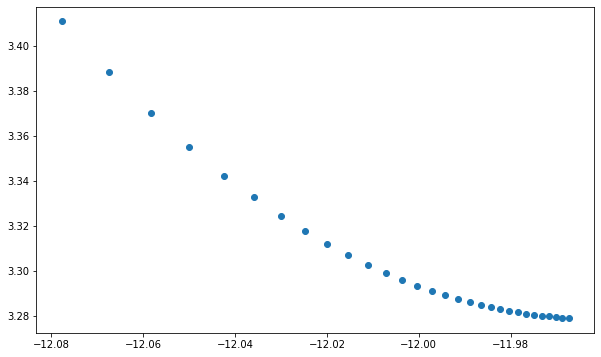

In [ ]:
# Results demonstration
# Checking that these are the Slater points
X, Y = [], []
integral_1 = np.array([- 1.0 * tau * np.exp(- i * tau * 0.1) for i in range(0, N)])
integral_1[0] *= 0.5
integral_1[-1] *= 0.5
mass_of_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
for tmpres in mass_of_res:
    x, y = calc_J(tmpres, N, T, tau, integral_1, mass_of_g)
    X.append(x)
    Y.append(y)
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X[:30], Y[:30])

In [ ]:
# Graph extension
# Checking that these are the Slater points
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X[:10], Y[:10])

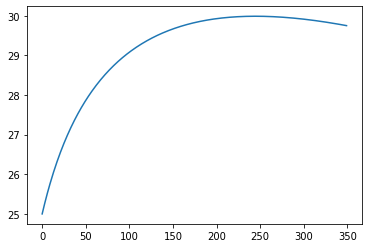

In [ ]:
# Trying to get normal initial conditions
mass_of_g = np.array([g_in_diff_eq(tau * i) for i in range(0, N)])
outes = eyler_solver(0.2 * np.ones(N), N, T, tau, mass_of_g)
plt.plot(outes)

0.010000000000000002